In [2]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime

In [3]:
import pandas as pd
import MySQLdb as mdb
%matplotlib inline

In [4]:
#returns list of [market, stock_sybol] by querying database.
MAX_LIMIT = 100000

#limit means the number of results to be returned. 0 means everything
def getSymbols(limit=10):
    if limit <= 0:
        limit = MAX_LIMIT
        
    conn = mdb.connect('localhost', 'usstock', 'usstock', 'usstock')
    cur = conn.cursor()
    sql = "SELECT market, symbol FROM symbols WHERE symbol REGEXP '^[A-Z]+$'"
    sql = sql + ' limit %d;'%(limit)
    #print sql
    #and market=\'NYSE\' 
    cur.execute(sql)
    stocks = []
    for i in range(cur.rowcount):
        row = cur.fetchone()
        market = row[0]
        stock = row[1]
        stocks.append([market, stock])
    # print cur.rowcount
    conn.close()
    return stocks

In [7]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 11, 14)

stocks = getSymbols(10)

stock_prices = list()
for s in stocks:
    f = web.DataReader(s[1], 'yahoo', start, end)
    prices = f.ix[:,'Adj Close']
    stock_prices.append((s[1], prices))

In [ ]:
print stock_prices

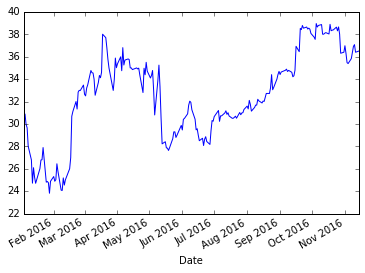

In [12]:
stock_prices[0][1].plot()

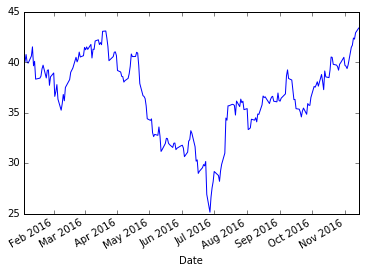

In [13]:
stock_prices[1][1].plot()

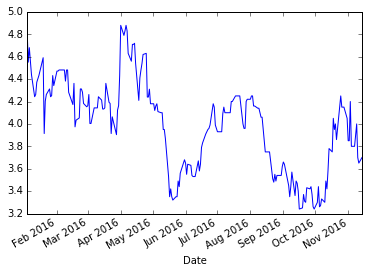

In [14]:
stock_prices[2][1].plot()

ABAC


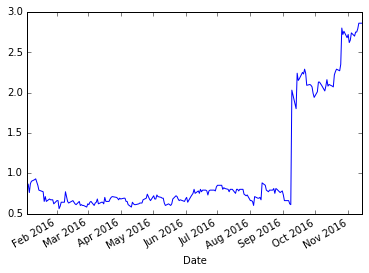

In [16]:
print stock_prices[9][0]
stock_prices[9][1].plot()

In [23]:
stock_prices[9][1][150:]

Date
2016-08-08    0.69
2016-08-09    0.69
2016-08-10    0.70
2016-08-11    0.67
2016-08-12    0.88
2016-08-15    0.85
2016-08-16    0.79
2016-08-17    0.78
2016-08-18    0.77
2016-08-19    0.79
2016-08-22    0.79
2016-08-23    0.81
2016-08-24    0.75
2016-08-25    0.81
2016-08-26    0.80
2016-08-29    0.76
2016-08-30    0.77
2016-08-31    0.78
2016-09-01    0.73
2016-09-02    0.66
2016-09-06    0.66
2016-09-07    0.62
2016-09-08    0.61
2016-09-09    2.03
2016-09-12    1.86
2016-09-13    1.80
2016-09-14    2.24
2016-09-15    2.15
2016-09-16    2.17
2016-09-19    2.25
              ... 
2016-10-04    2.13
2016-10-05    2.13
2016-10-06    2.11
2016-10-07    2.09
2016-10-10    2.02
2016-10-11    2.08
2016-10-12    2.16
2016-10-13    2.08
2016-10-14    2.10
2016-10-17    2.08
2016-10-18    2.07
2016-10-19    2.22
2016-10-20    2.26
2016-10-21    2.29
2016-10-24    2.27
2016-10-25    2.35
2016-10-26    2.80
2016-10-27    2.72
2016-10-28    2.76
2016-10-31    2.68
2016-11-01    2.72
2016-11